<a href="https://colab.research.google.com/github/LanqingDu/UnstructuredDataAnalytics/blob/main/06_Word_Document_Freq.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Getting Started with R Language**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** This notebook referenced to R user guide content, Machine Learning resoures, and the content created by Prof.Timothy E. Carone.  
> **Objective:** Introduction to frequency counts using R.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

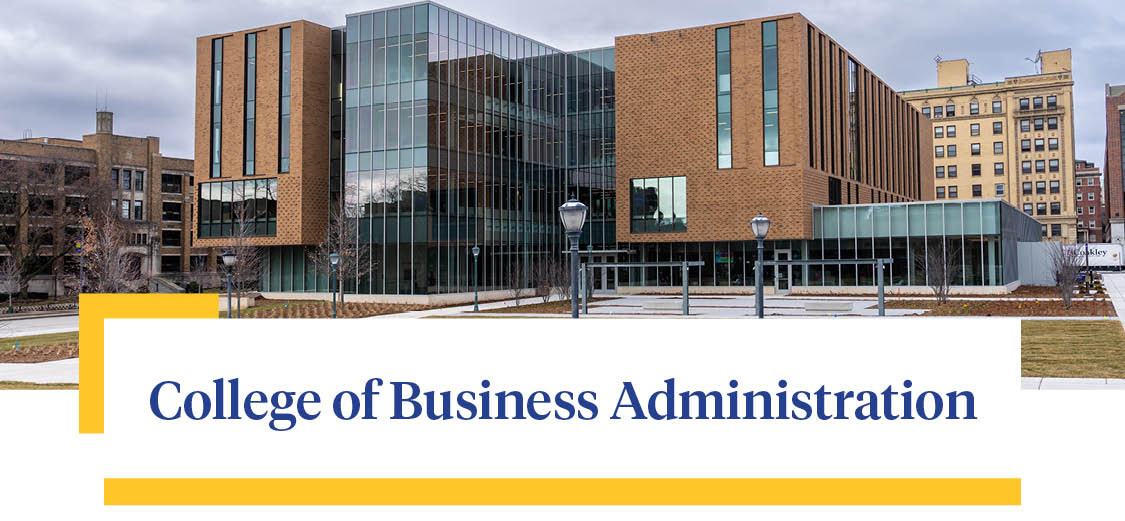
---

## [1. Intro](#intro)


Introduction to the sentiment analytics workflow overview.

## [2. Objective](#obj)

This tutorial utilizes the dataset available through the [gutenbergr package](https://cran.r-project.org/web/packages/gutenbergr/index.html).

We begin our introduction to frequency counts starting from the *count()* function. The following tasks will guide our workflow:

1. **Library Setup**
Install and load all required packages for data access, text processing, and visualization.

2. **Data Exploration**
Import the dataset and review its structure, variables, and any predefined helper functions.

3. **Text Preprocessing**
Clean and transform the text into a structured format (e.g., data frame or tibble) for analysis — also known as text tidying.

4. **Word Frequency Analysis**
Use count() to identify and visualize the most frequent words in the corpus.

5. **TF-IDF Analysis**
Apply Term Frequency–Inverse Document Frequency to highlight words that are important within individual documents relative to the entire corpus.

6. **N-gram Analysis**
Generate and analyze N-grams (bigrams, trigrams, etc.) to capture multi-word expressions and contextual relationships.






## [3. Gutenbergr data](#pract1)

### 3.1. Load the library and the data

In [ ]:
# ========================================================
# Step 1: Download and include the library
# ========================================================

install.packages("gutenbergr")
library(gutenbergr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘readMDTable’, ‘urltools’




**Preview The Library:**

This [package](https://cran.r-project.org/web/packages/gutenbergr/index.html) provides easy access to the Project [Gutenberg collection](https://www.gutenberg.org/) of public domain books. It allows you to download, search, and work with full texts from Project Gutenberg directly within R.

- `gutenberg_metadata`: a data frame of metadata (titles, authors, languages, subjects, etc.) for over 70,000 Project Gutenberg works.

- `gutenberg_works()`: a convenient function to search or filter works by author, title, or language.

- `gutenberg_download()`: downloads full texts of works by their Gutenberg ID and returns a tidy tibble, where each row is a single line of text.

- `gutenberg_strip()`: cleans the downloaded text by removing headers and footers automatically added by Project Gutenberg.

### 3.2. Load the text processing libraries

In [ ]:
# ========================================================
# Step 2: Include other required libraries
# ========================================================

install.packages("tidyverse")
install.packages("tidytext")
install.packages("stopwords")

library(tidyverse)
library(tidytext)
library(stopwords)
library(ggplot2)
# library(forcats) # included in the tidyverse package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 3.3. Tidy text and tokenize

In [ ]:
# ========================================================
# Step 3: Tidy text and tokenize for specified books
# ========================================================

#  gutenberg_works(...)
#   ...          : Optional filtering expressions (tidy evaluation) used to select specific works
#                  from the built-in `gutenberg_metadata` dataset (e.g., by author, title, language).
#   Returns      : A tibble containing metadata about Project Gutenberg works.
#   Output       : Columns typically include 'gutenberg_id', 'title', 'author', 'language',
#                  'rights', and other metadata fields.


#  str_detect(string, pattern)
#   string       : A character vector to search within (e.g., a column called `author`).
#   pattern      : A character string or regular expression to match against each element in `string`.
#   Returns      : A logical vector (TRUE/FALSE) of the same length as `string`.
#   Output       : TRUE if `pattern` is found in the corresponding element of `string`, otherwise FALSE.

#   gutenberg_download(gutenberg_id, meta_fields = NULL, mirror = "http://www.gutenberg.org")
#   gutenberg_id : A numeric vector of one or more Project Gutenberg IDs representing the books
#                  you want to download. This is a required parameter.
#   meta_fields  : Optional. A character vector specifying which metadata fields
#                  (e.g., "title", "author", "language") to include as extra columns in the output
#   mirror       : Optional. A URL string specifying which Project Gutenberg mirror to use for    downloading (useful if the default server is slow or blocked).
#   Returns      : A tibble with one row per line of text for each downloaded book.
#   Output       : Columns typically include:
#                    - `gutenberg_id` : the numeric ID of the text
#                    - `text`         : the actual text line
#                    - plus any metadata columns (e.g., `author`)


# doyle <- gutenberg_works(str_detect(author, "Doyle"))
books <- gutenberg_download(gutenberg_id = c(30155, 13476),
                            meta_fields = "author",
                            "http://mirrors.xmission.com/gutenberg/")

# Recall the function syntax from the previous .ipynb file and course notes.
books <- as_tibble(books) %>%
          mutate(document = row_number()) %>%
          select(-gutenberg_id)

tidy_books <- books %>%
              unnest_tokens(word, text) %>%
              group_by(word) %>%
              filter(n() > 10) %>%
              ungroup()

stopword <- stopwords::stopwords("en") %>%
            as_tibble() %>%
            rename(word = value)
# equivalent to
# stopword <- as_tibble(stopwords::stopwords("en"))
# stopword <- rename(stopword, word=value)

tb <- anti_join(tidy_books, stopword, by = 'word')

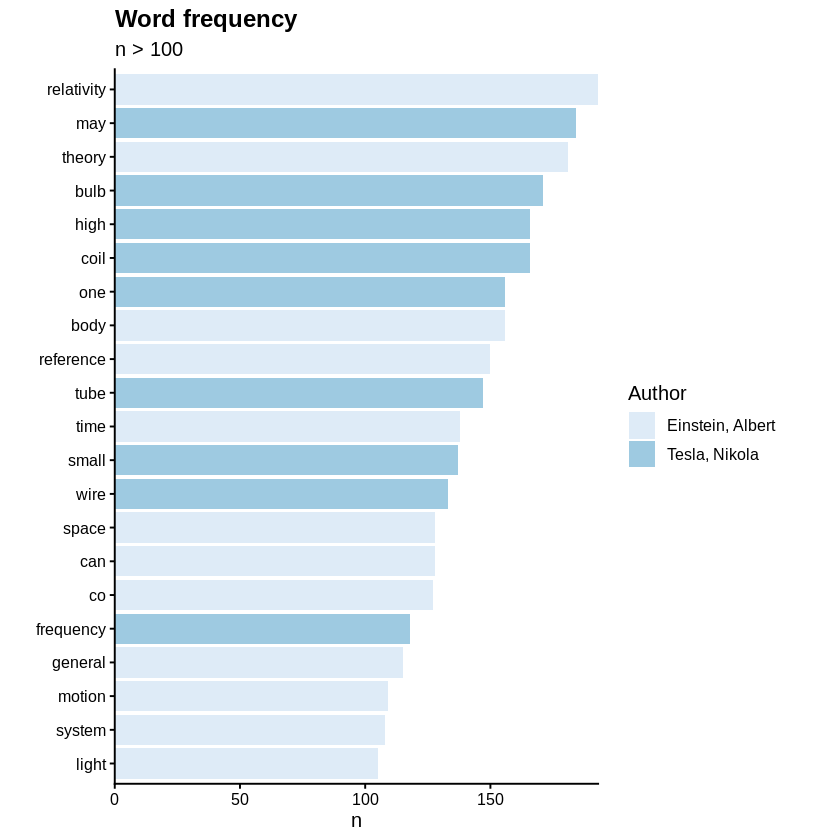

In [ ]:
# ============================================================
# Step 4 - 1: visualization for descriptive statistics count()
#             Plot terms with a freq >= 100 (for all authors)
# ============================================================

# Recall the function syntax from the previous .ipynb file and course notes.
tb %>%
count(author, word, sort = TRUE) %>%
filter(n > 100) %>%
mutate(word = reorder(word, n)) %>%
    ggplot(aes(word, n)) +
    geom_col(aes(fill=author)) +
    xlab(NULL) +
    scale_y_continuous(expand = c(0, 0)) + # Adjust the y-axis limits with no expansion
    coord_flip() +
    theme_classic(base_size = 12) +
    labs(fill= "Author", title="Word frequency", subtitle="n > 100")+
    theme(plot.title = element_text(lineheight=.8, face="bold")) +
    scale_fill_brewer() # Use Brewer color scales for the fill colors in the plot

Selecting by n


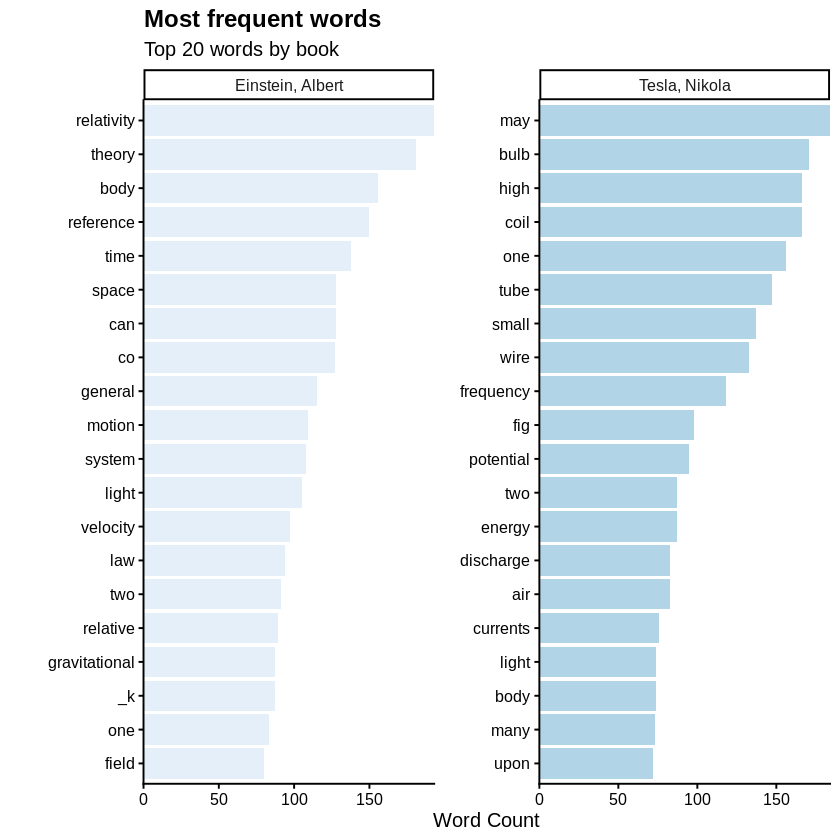

In [ ]:
# ============================================================
# Step 4 - 2: visualization for descriptive statistics count()
#             Plot top 20 terms (for each author)
# ============================================================

# Recall the function syntax from the previous .ipynb file and course notes.
tb %>%
count(author, word, sort = TRUE) %>%
group_by(author) %>%
top_n(20) %>%
ungroup() %>% #
  ggplot(aes(reorder_within(word, n, author), n,
    fill = author)) +
  geom_col(alpha = 0.8, show.legend = FALSE) +
  scale_x_reordered() + # Scale the x-axis to match the reordered words within each author group
  coord_flip() +
  facet_wrap(~author, scales = "free") + # Facet the plot by author, allowing each author to have its own subplot with independent y-axis scales
  scale_y_continuous(expand = c(0, 0)) +
  theme_classic(base_size = 12) +
  labs(fill= "Author",
       title="Most frequent words",
       subtitle="Top 20 words by book",
       x= NULL,
       y= "Word Count")+
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer()

### 3.4. Processing the stopwords

Selecting by n


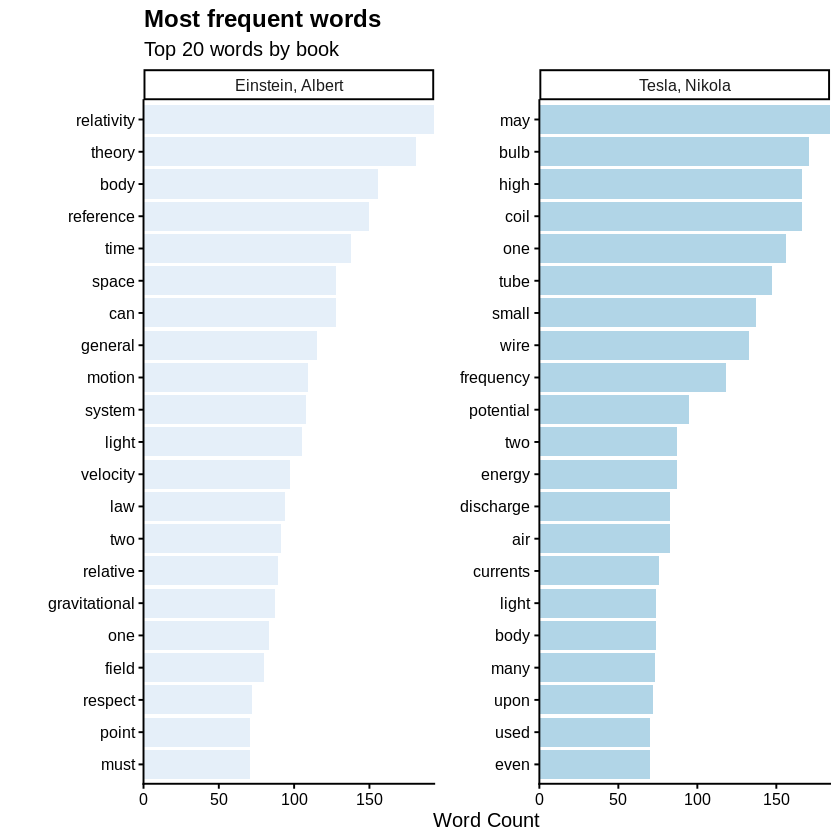

In [ ]:
# ============================================================
# Step 5: remove stop words (customized stopwords)
#         remove the terms like “_k”, “co”, and “fig”
# ============================================================

# Recall the function syntax from the previous .ipynb file and course notes.
newstopwords <- tibble(word = c("eq", "co", "rc", "ac", "ak", "bn",
                                "fig", "file", "cg", "cb", "cm",
                                "ab", "_k", "_k_", "_x"))

tb <- anti_join(tb, newstopwords, by = "word")

tb %>%
count(author, word, sort = TRUE) %>%
group_by(author) %>%
top_n(20) %>%
ungroup() %>% #
  ggplot(aes(reorder_within(word, n, author), n,
    fill = author)) +
  geom_col(alpha = 0.8, show.legend = FALSE) +
  scale_x_reordered() + # Scale the x-axis to match the reordered words within each author group
  coord_flip() +
  facet_wrap(~author, scales = "free") + # Facet the plot by author, allowing each author to have its own subplot with independent y-axis scales
  scale_y_continuous(expand = c(0, 0)) +
  theme_classic(base_size = 12) +
  labs(fill= "Author",
       title="Most frequent words",
       subtitle="Top 20 words by book",
       x= NULL,
       y= "Word Count")+
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer()

### 3.5 Term Frequency–Inverse Document Frequency (TF–IDF)



1. **TF**: Term Frequency measures how often a word appears within a single document, providing insight into which terms are most common in that document. However, some words may occur frequently (e.g., “the,” “and”) without carrying significant meaning.

2. **IDF**: Inverse Document Frequency addresses this limitation by reducing the weight of commonly used words and increasing the weight of rarer terms across a collection of documents. It quantifies how unique or rare a term is within the entire corpus.

3. **TF-IDF**: When TF and IDF are multiplied, they form TF–IDF, a composite measure that highlights words that **frequent in a specific document but uncommon across other documents**. This makes TF–IDF an effective metric for identifying terms that are **characteristic or distinctive to a particular text**.


The tidytext package in R provides a tidy implementation of TF–IDF, allowing users to efficiently explore and visualize word importance within document collections or text corpora.




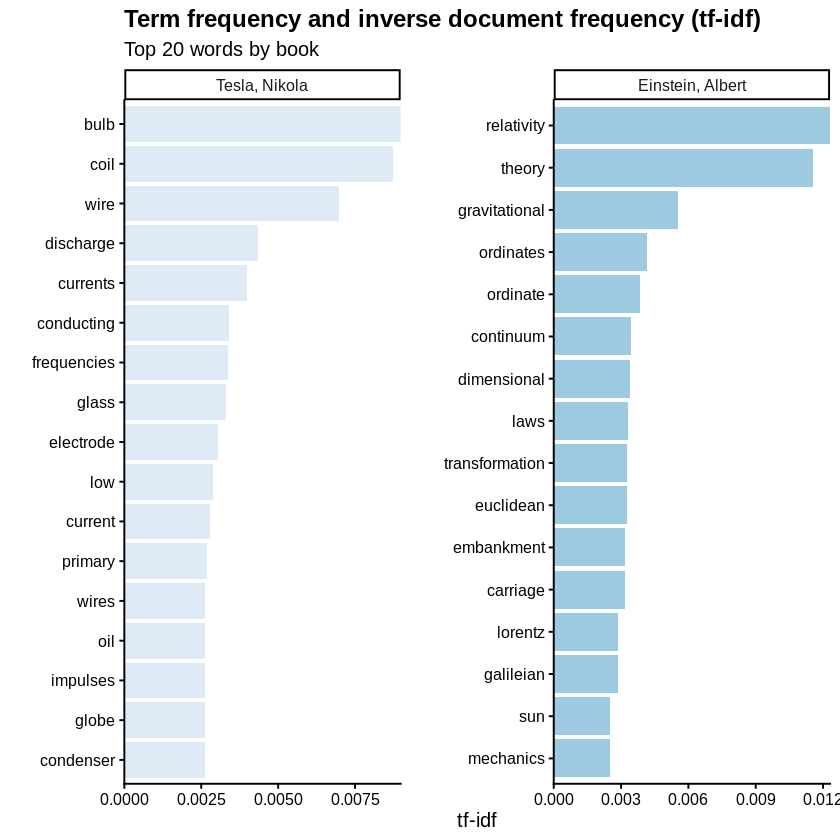

In [ ]:
# ============================================================
# Step 6: remove stop words (customized stopwords)
#         remove the terms like “_k”, “co”, and “fig”
# ============================================================

tf_idf <- tb %>%
          count(author, word, sort = TRUE) %>%
          bind_tf_idf(word, author, n)

plot_tb <- tf_idf %>% # Calculates the TF-IDF values based on its frequency (n)
mutate(word = fct_reorder(word, tf_idf)) %>% # Reorder words by their tf-idf scores
mutate(author = factor(author, levels = c("Tesla, Nikola", "Einstein, Albert")))

plot_tb %>%
group_by(author) %>%
top_n(20, tf_idf) %>%
ungroup() %>%
mutate(word = reorder(word, tf_idf)) %>%
ggplot(aes(word, tf_idf, fill = author)) +
  scale_y_continuous(expand = c(0, 0)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~author, ncol = 2, scales = "free") +
  coord_flip() +
  theme_classic(base_size = 12) +
  labs(fill= "Author",
       title="Term frequency and inverse document frequency (tf-idf)",
       subtitle="Top 20 words by book",
       x= NULL,
       y= "tf-idf") +
  theme(plot.title = element_text(lineheight=.8, face="bold")) +
  scale_fill_brewer()



### 3.6 N-grams (Next week)